In [0]:
import fastai
from fastai.vision import *
import pandas as pd
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from pathlib import Path
from google.colab import drive
import csv
import glob

In [34]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
path_to_folder = 'gdrive/My Drive/Dataset/The Picnic Hackathon 2019/'
df = pd.read_csv(path_to_folder + "train.tsv",  sep='\t')

In [0]:
pathTrain = Path("gdrive/My Drive/train/")

In [0]:
tfms = get_transforms()

In [0]:
bunch = ImageDataBunch.from_df(pathTrain, df, size=224)

In [0]:
bunch.normalize(imagenet_stats)

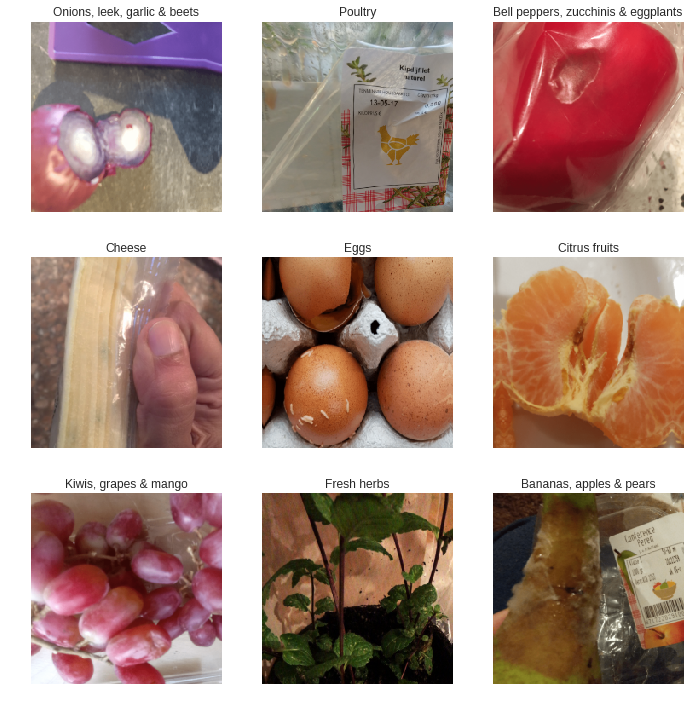

In [9]:
bunch.show_batch(rows=3, figsize=(10,10))

In [39]:
learn = create_cnn(bunch, models.resnet50, metrics=[accuracy, error_rate])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learn.fit_one_cycle(25)

epoch,train_loss,valid_loss,accuracy,error_rate,time


In [0]:
learn.unfreeze()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

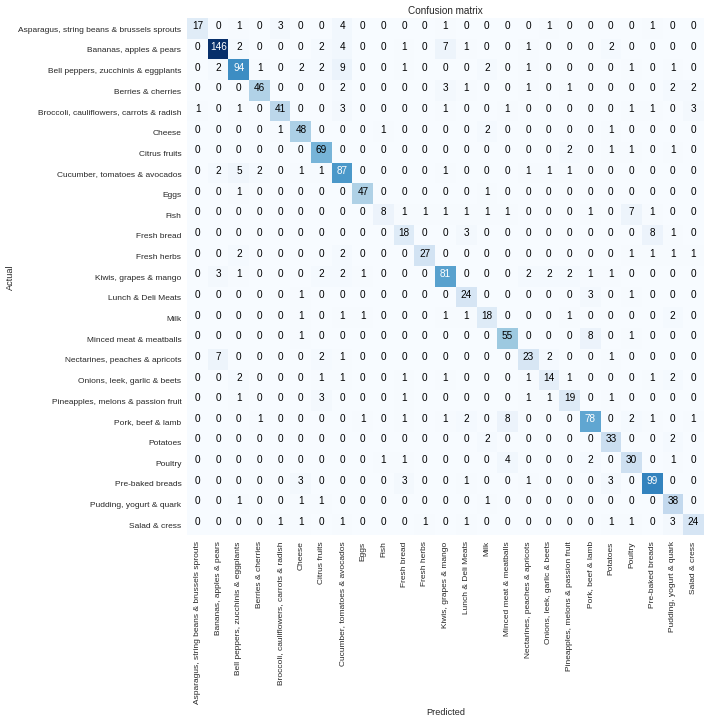

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

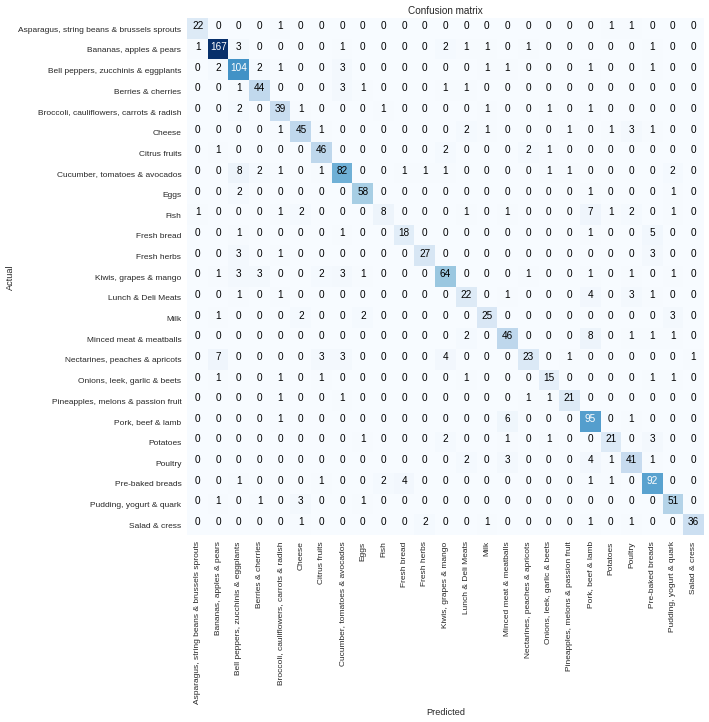

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
cm = interp.confusion_matrix()

In [0]:
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
num_classes = 25
TN = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))
precision = TP/(TP+FP)
recall = TP/(TP+FN)

In [0]:
F1 = 2 * (precision.mean() * recall.mean()) / (precision.mean() + recall.mean())

In [22]:
F1

0.8103049302883178

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


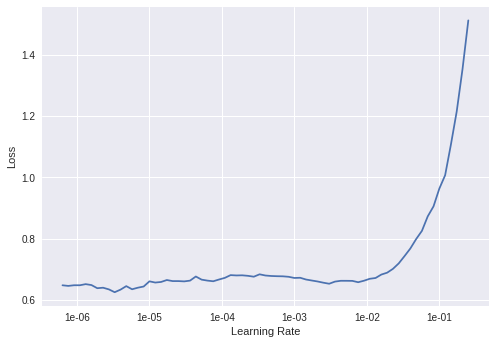

In [28]:
learn.lr_find()

In [0]:
learn.save('resnet25')

epoch,train_loss,valid_loss,accuracy,time
0,2.988382,79.060410,0.093728,09:28
1,2.821205,2.550109,0.254307,09:32
2,2.495997,2.675143,0.350103,09:39


In [0]:
files = glob.glob(path_to_folder + 'test/*')

In [0]:
results = []
i = 0
for file in files:
    print(i)
    i+=1
    img = open_image(Path(file))
    #img = cv2.resize(img, (224, 224))
    #img = img/255
    cat, idx, out = learn.predict(img)
    # label = labels[np.argmax(result)]
    filename = os.path.basename(file)
    results.append([filename, str(cat)])

In [0]:
headers = ['file', 'label']
df = pd.DataFrame(results, columns=headers)